In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['man','woman']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='C:/Users/santo/OneDrive/Desktop/ImageRec'
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : man
loaded category:man successfully
loading... category : woman
loaded category:woman successfully


In [2]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [4]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0]
The actual data is:
[1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0]
The model is 83.78378378378379% accurate


Enter URL of Image :C:\\Users\\santo\\Downloads\\WhatsApp Image 2022-09-01 at 07.00.07.jpeg


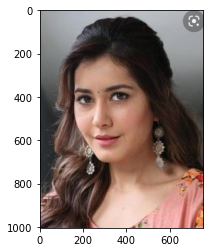

man = 43.31412996076895%
woman = 56.68587003923105%
The predicted image is : woman


In [5]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

Enter URL of Image :C:\\Users\\santo\\Downloads\\WhatsApp Image 2022-09-01 at 06.52.47 (1).jpeg


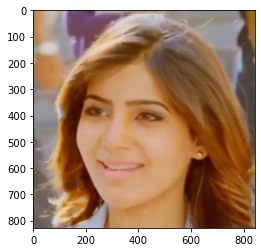

man = 28.63394853317785%
woman = 71.36605146682219%
The predicted image is : woman


In [8]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

Enter URL of Image :C:\\Users\\santo\\Downloads\\WhatsApp Image 2022-09-01 at 06.57.04.jpeg


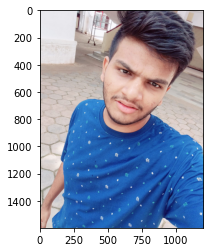

man = 96.64759682942544%
woman = 3.352403170574551%
The predicted image is : man


In [9]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

Enter URL of Image :C:\\Users\\santo\\Downloads\\WhatsApp Image 2022-09-01 at 06.55.51.jpeg


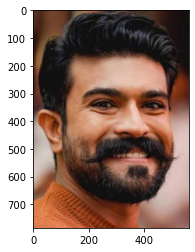

man = 93.6379581827207%
woman = 6.3620418172793025%
The predicted image is : man


In [15]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

In [11]:
def genderclassifier():
    url=input('Enter URL of Image :')
    img=imread(url)
    plt.imshow(img)
    plt.show()
    img_resize=resize(img,(150,150,3))
    l=[img_resize.flatten()]
    probability=model.predict_proba(l)
    for ind,val in enumerate(Categories):
        print(f'{val} = {probability[0][ind]*100}%')
    print("The predicted image is : "+Categories[model.predict(l)[0]])

Enter URL of Image :C:\\Users\\santo\\Downloads\\WhatsApp Image 2022-09-01 at 09.35.12.jpeg


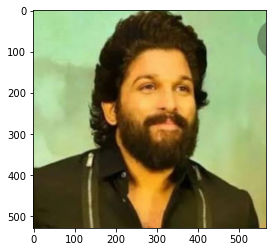

man = 90.12402496438702%
woman = 9.875975035612965%
The predicted image is : man


In [16]:
genderclassifier()

Enter URL of Image :C:\\Users\\santo\\Downloads\\WhatsApp Image 2022-09-01 at 09.39.44.jpeg


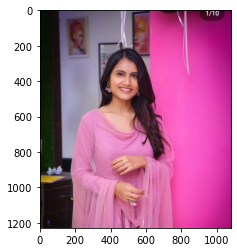

man = 24.377496641498954%
woman = 75.62250335850105%
The predicted image is : woman


In [18]:
genderclassifier()